Graças aos módulos e biblioteca, a criação de uma modelo é uma tarefa relativamente fácil. Que  envolve apenas três linhas de código.

- Primeiro criamos os objetos do modelo.

- Depois ajustamos o modelo aos dados de treinamento.

- Em seguida, verificamos o treinamento dos modelos e testamos o desempenho.

#### Vamos inicar importando os módulos:

In [592]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

Agora temos que fazer a fazer o download e instalação de diferentes recursos e dados linguísticos da biblioteca NLTK (Natural Language Toolkit):
- **nltk.download("wordnet")**: Este comando faz o download e a instalação do WordNet, que é um analisador léxico e uma base de dados de palavras em inglês. O WordNet contém informações sobre sinônimos, antônimos, hiperonímia, hiponímia e outras relações semânticas entre palavras. É usado, por exemplo, para lematização e para encontrar relações entre palavras.

- **nltk.download('punkt')**: Este comando faz o download e a instalação de dados relacionados à tokenização. Esses tokens podem ser palavras, pontuações, entre outros. O download dos dados do Punkt é necessário para realizar a tokenização com precisão.

- **nltk.download('averaged_perceptron_tagger')**: Este comando faz o download e a instalação dos dados do averaged_perceptron_tagge. O tagger é usado para atribuir uma classe gramatical (part-of-speech, POS) a cada token em um texto. Isso é essencial para análises linguísticas como a lematização.

- **nltk.download('omw-1.4')**: Este comando faz o download e a instalação do Open Multilingual WordNet (OMW), que é uma versão multilíngue do WordNet. Ele contém informações lexicais para várias línguas, permitindo que você use recursos do WordNet para outras línguas além do inglês.

In [593]:
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

#### Agora podemos colocar nossos dados em um DadaFrame:

In [594]:
df = pd.read_excel('filmes.xlsx')

In [595]:
df.head()

,Filme,Frase,Categoria
0,O Poderoso Chefão,Vou fazer-lhe uma proposta que ele não poderá ...,Crime / Drama
1,Star Wars: Uma Nova Esperança,"A Força estará com você, sempre.",Ficção Científica / Aventura
2,Scarface,Eu sempre digo a verdade. Mesmo quando minto.,Crime / Drama
3,O Senhor dos Anéis: A Sociedade do Anel,O mundo está mudando. Sinto-o na água. Sinto-o...,Fantasia / Aventura
4,Forrest Gump - O Contador de Histórias,A vida é como uma caixa de chocolates: você nu...,Drama / Comédia


In [596]:
df.shape

(126, 3)

In [597]:
inputs = df['Frase']
labels = df['Categoria']

<Axes: >

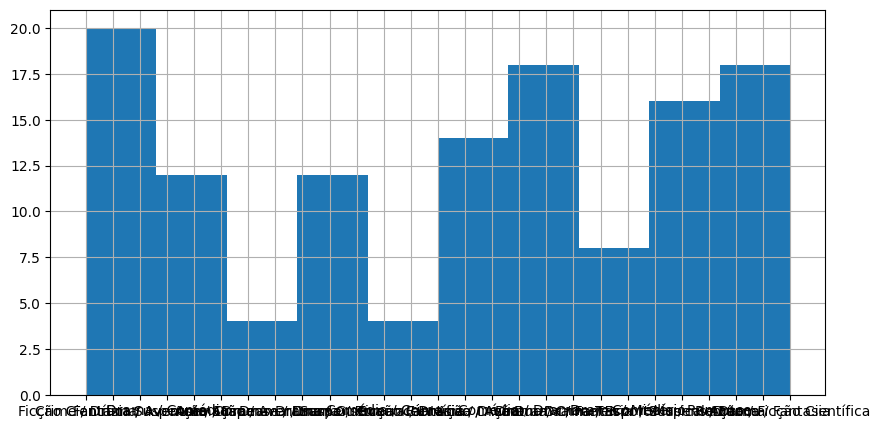

In [598]:
labels.hist(figsize=(10, 5))

#### O próximo passo é dividir o nosso conjunto de dados em conjuntos de treinamento e teste.

In [599]:
inputs_train, inputs_test, Ytrain, Ytest = train_test_split(inputs, labels, random_state=123)

#### Atenção:
O argumento **random_state** é opcional, ele que define uma semente para o gerador de números aleatórios. Ele garante que a divisão seja reproduzível, ou seja, se você usar o mesmo valor de random_state, obterá a mesma divisão sempre que executar o código. Isso é útil para fins de depuração e reprodutibilidade.

### **Agora podemos iniciar o processo.**

#### Primeiro iremos fazer a vetorização nos conjuntos de dados de treinamento e de testes:

In [600]:
vectorizer = CountVectorizer()

In [601]:
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

In [602]:
Xtrain

<94x250 sparse matrix of type '<class 'numpy.int64'>'
	with 795 stored elements in Compressed Sparse Row format>

#### Qual porcentagem de valores é diferente de zero?

In [603]:
(Xtrain != 0).sum()

795

In [604]:
(Xtrain != 0).sum() / np.prod(Xtrain.shape)

0.033829787234042556

#### Agora podemos treinar e verificar nosso modelo.

In [605]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9893617021276596
test score: 0.90625


O MultinomialNB() é mais simples do que uma rede neural. Ele calcula probabilidades baseadas nas frequências de palavras e rótulos nos dados de treinamento e, em seguida, usa essas probabilidades para classificar novos dados.

Em contraste, as redes neurais são algoritmos mais complexos que consistem em camadas de neurônios interconectados. Elas exigem ajuste de muitos parâmetros e treinamento por meio do processo de backpropagation.

Portanto, enquanto o MultinomialNB() é um classificador Naive Bayes que faz uso de probabilidades condicionais, uma rede neural é uma estrutura mais complexa que envolve camadas de neurônios interconectados e requer técnicas de otimização para ajustar os pesos das conexões durante o treinamento.

O Naive Bayes é um algoritmo de aprendizado de máquina que se baseia no teorema de Bayes para realizar a classificação. Ele assume independência condicional entre as variáveis (no caso do MultinomialNB(), entre as palavras ou recursos) e é especialmente adequado para tarefas de classificação de texto.

### Criando um DataFrame para comparar os resultados

In [606]:
import pandas as pd

In [607]:
# Dados iniciais em forma de dicionário
data = {
    'Método': ['Básico'],
    'Train score': [str(model.score(Xtrain, Ytrain))],
    'Test score': [str(model.score(Xtest, Ytest))]
}

In [608]:
df = pd.DataFrame(data)

In [609]:
df

,Método,Train score,Test score
0,Básico,0.9893617021276596,0.90625


#### Tratando StopWords

In [610]:
vectorizer = CountVectorizer(stop_words='english')
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9893617021276596
test score: 0.90625


**Adicionando um novo registro ao DataFrame**

In [611]:
novo_registro = {'Método': 'StopWords',
                 'Train score': str(model.score(Xtrain, Ytrain)),
                 'Test score': str(model.score(Xtest, Ytest))}

In [612]:
df = df._append(novo_registro, ignore_index=True)
df

,Método,Train score,Test score
0,Básico,0.9893617021276596,0.90625
1,StopWords,0.9893617021276596,0.90625


#### Fazendo a Lemmatization

In [613]:
def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith('J'):
    return wordnet.ADJ
  elif treebank_tag.startswith('V'):
    return wordnet.VERB
  elif treebank_tag.startswith('N'):
    return wordnet.NOUN
  elif treebank_tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

In [614]:
class LemmaTokenizer:
  def __init__(self):
    self.wnl = WordNetLemmatizer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    words_and_tags = nltk.pos_tag(tokens)
    return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in words_and_tags]

In [615]:
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9574468085106383
test score: 0.8125


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


**Adicionando um novo registro ao DataFrame**

In [616]:
novo_registro = {'Método': 'Lemmatization',
                 'Train score': str(model.score(Xtrain, Ytrain)),
                 'Test score': str(model.score(Xtest, Ytest))}

In [617]:
df = df._append(novo_registro, ignore_index=True)
df

,Método,Train score,Test score
0,Básico,0.9893617021276596,0.90625
1,StopWords,0.9893617021276596,0.90625
2,Lemmatization,0.9574468085106383,0.8125


#### Aplicando stemming

In [618]:
class StemTokenizer:
  def __init__(self):
    self.porter = PorterStemmer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    return [self.porter.stem(t) for t in tokens]

In [619]:
vectorizer = CountVectorizer(tokenizer=StemTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9574468085106383
test score: 0.875


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


**Adicionando um novo registro ao DataFrame**

In [620]:
novo_registro = {'Método': 'Stemming',
                 'Train score': str(model.score(Xtrain, Ytrain)),
                 'Test score': str(model.score(Xtest, Ytest))}

In [621]:
df = df._append(novo_registro, ignore_index=True)
df

,Método,Train score,Test score
0,Básico,0.9893617021276596,0.90625
1,StopWords,0.9893617021276596,0.90625
2,Lemmatization,0.9574468085106383,0.8125
3,Stemming,0.9574468085106383,0.875


#### Usando a função string split como tokenizer

In [622]:
def simple_tokenizer(s):
  return s.split()

In [623]:
vectorizer = CountVectorizer(tokenizer=simple_tokenizer)
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 1.0
test score: 0.9375


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


**Adicionando um novo registro ao DataFrame**

In [624]:
novo_registro = {'Método': 'String Split',
                 'Train score': str(model.score(Xtrain, Ytrain)),
                 'Test score': str(model.score(Xtest, Ytest))}

In [625]:
df = df._append(novo_registro, ignore_index=True)
df

,Método,Train score,Test score
0,Básico,0.9893617021276596,0.90625
1,StopWords,0.9893617021276596,0.90625
2,Lemmatization,0.9574468085106383,0.8125
3,Stemming,0.9574468085106383,0.875
4,String Split,1.0,0.9375


In [626]:
df.set_index('Método', inplace=True)
df

,Train score,Test score
Método,,
Básico,0.9893617021276596,0.90625
StopWords,0.9893617021276596,0.90625
Lemmatization,0.9574468085106383,0.8125
Stemming,0.9574468085106383,0.875
String Split,1.0,0.9375
